<a href="https://colab.research.google.com/github/jyoti-kumbhar/Data-Science/blob/main/prac9_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Practical 9
*   Aim: Principal Component Analysis (PCA)
1.  Perform PCA on a dataset to reduce dimensionality.
2.  Evaluate the explained variance and select the appropriate number of principal components.
3.  Visualize the data in the reduced-dimensional space.
*   T091 Jyoti Kumbhar



In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [16]:
df = pd.read_csv("/content/SmartHome.csv")
df.head()

/tmp/ipython-input-2398451510.py:1: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/SmartHome.csv")


,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [17]:
print(df.dtypes)

time                    object
use [kW]               float64
gen [kW]               float64
House overall [kW]     float64
Dishwasher [kW]        float64
Furnace 1 [kW]         float64
Furnace 2 [kW]         float64
Home office [kW]       float64
Fridge [kW]            float64
Wine cellar [kW]       float64
Garage door [kW]       float64
Kitchen 12 [kW]        float64
Kitchen 14 [kW]        float64
Kitchen 38 [kW]        float64
Barn [kW]              float64
Well [kW]              float64
Microwave [kW]         float64
Living room [kW]       float64
Solar [kW]             float64
temperature            float64
icon                    object
humidity               float64
visibility             float64
summary                 object
apparentTemperature    float64
pressure               float64
windSpeed              float64
cloudCover              object
windBearing            float64
precipIntensity        float64
dewPoint               float64
precipProbability      float64
dtype: o

In [18]:
df1 = df.copy()
df.drop(columns=['Garage door [kW]','Kitchen 38 [kW]','icon','summary','cloudCover'], axis=1, inplace=True)
df1=df1.drop("summary",axis=1)

In [19]:
df1.isnull().sum()

,0
time,0
use [kW],1
gen [kW],1
House overall [kW],1
Dishwasher [kW],1
Furnace 1 [kW],1
Furnace 2 [kW],1
Home office [kW],1
Fridge [kW],1
Wine cellar [kW],1


In [20]:
import numpy as np
df1= df1.select_dtypes(include=['float64','int64'])
# Drop rows with NaN values
df1 = df1.dropna()
#standardize the feature matrix
X= StandardScaler().fit_transform(df1)
#create a PCA that will retain 99% of the variance
pca= PCA (n_components=0.99, whiten=True)
#conduct PCA
X_pca = pca.fit_transform(X)

In [21]:
print('Original number of features: ', X.shape[1])
print('Reduced number of features: ', X_pca.shape[1])

Original number of features:  28
Reduced number of features:  23


In [22]:
# Reducing Features When Data Is Linearly Inseparable
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles
#create linearly inseparable data
X, _=make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.1)
#Apply kernel PCA with radius basis function (RBF) kernel
kpca = KernelPCA(kernel='rbf', gamma=5, n_components=1)
X_kpca = kpca.fit_transform(X)

In [23]:
print('Original number of features: ', X.shape[1])
print('Reduced number of features: ', X_kpca.shape[1])

Original number of features:  2
Reduced number of features:  1


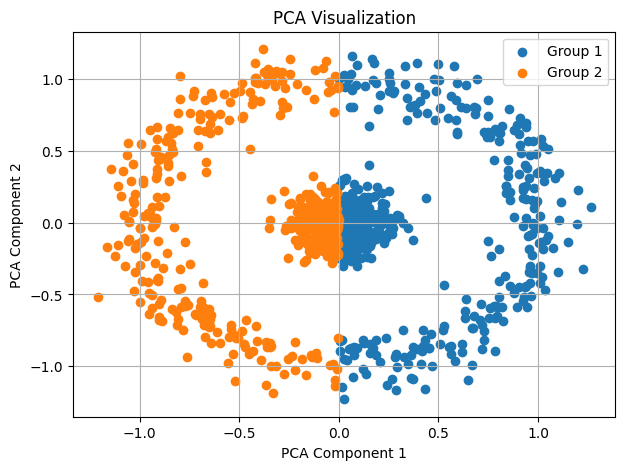

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# PCA with 2 components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

# Create two groups based on component 1
group1 = pca_data[:, 0] >= np.median(pca_data[:, 0])
group2 = pca_data[:, 0] < np.median(pca_data[:, 0])

plt.figure(figsize=(7,5))

plt.scatter(pca_data[group1, 0], pca_data[group1, 1], label="Group 1")
plt.scatter(pca_data[group2, 0], pca_data[group2, 1], label="Group 2")

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Visualization")
plt.legend()
plt.grid(True)
plt.show()

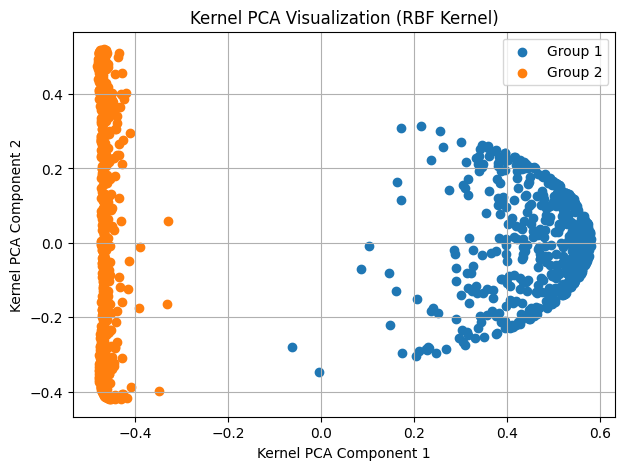

In [25]:
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
import numpy as np

# Kernel PCA with RBF kernel (non-linear PCA)
kpca = KernelPCA(kernel='rbf', gamma=5, n_components=2)
kpca_data = kpca.fit_transform(X)

# Create 2 groups for coloring
group1 = kpca_data[:, 0] >= np.median(kpca_data[:, 0])
group2 = kpca_data[:, 0] < np.median(kpca_data[:, 0])

plt.figure(figsize=(7,5))

plt.scatter(kpca_data[group1, 0], kpca_data[group1, 1], label="Group 1")
plt.scatter(kpca_data[group2, 0], kpca_data[group2, 1], label="Group 2")

plt.xlabel("Kernel PCA Component 1")
plt.ylabel("Kernel PCA Component 2")
plt.title("Kernel PCA Visualization (RBF Kernel)")
plt.legend()
plt.grid(True)
plt.show()


In [26]:
#Reducing Features by Maximizing Class Separability
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np

x =df1.drop('precipProbability',axis=1)
y =df1['precipProbability']

# Assign class 1 if precipProbability > 0, else class 0
y = (y > 0).astype(int)

# It's good practice to ensure there are at least two distinct classes for LDA
if len(np.unique(y)) < 2:
    print("Warning: Less than two distinct classes found after discretizing 'precipProbability'. LDA may not be meaningful.")

#create an LDA that will reduce the data down to 1 feature
lda = LinearDiscriminantAnalysis(n_components=1)
#run LDA
X_lda = lda.fit_transform(x,y)

In [27]:
print('Original number of features: ',x.shape[1])
print('Reduced number of features: ', X_lda.shape[1])

Original number of features:  27
Reduced number of features:  1


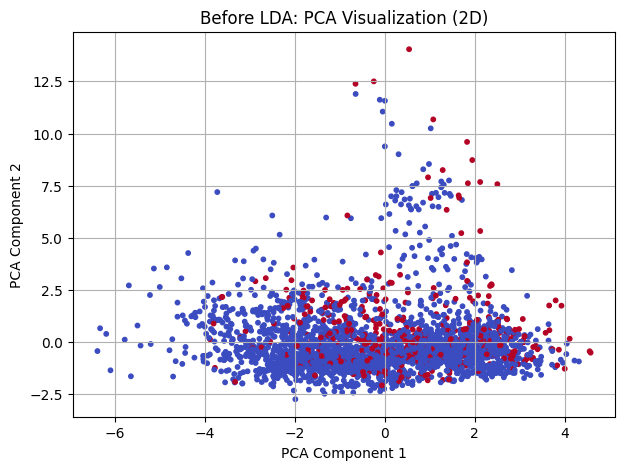

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

# Features (X) and target (y)
x_for_pca = df1.drop('precipProbability', axis=1)
y_for_plot = (df1['precipProbability'] > 0).astype(int)

# ----- DOWNSAMPLE to avoid messy graph -----
sample_size = 3000   # choose 3000 clean points
idx = np.random.choice(len(x_for_pca), sample_size, replace=False)

x_sample = x_for_pca.iloc[idx]
y_sample = y_for_plot.iloc[idx]

# Standardize the downsampled data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_sample)

# PCA for visualization
pca_vis = PCA(n_components=2)
pca_2d = pca_vis.fit_transform(x_scaled)

plt.figure(figsize=(7,5))
plt.scatter(pca_2d[:,0], pca_2d[:,1], c=y_sample, cmap='coolwarm', s=10)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Before LDA: PCA Visualization (2D)")
plt.grid(True)
plt.show()


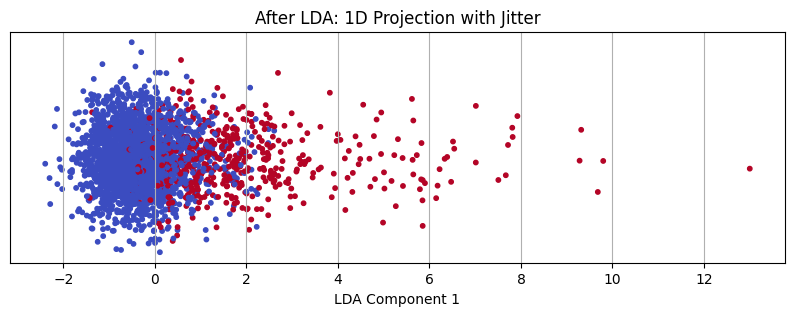

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Add small random noise in y-axis for visibility
y_jitter = np.random.normal(0, 0.02, size=len(X_lda))

plt.figure(figsize=(10,3))
plt.scatter(X_lda, y_jitter, c=y_lda_in, cmap='coolwarm', s=10)
plt.yticks([])
plt.xlabel("LDA Component 1")
plt.title("After LDA: 1D Projection with Jitter")
plt.grid(True)
plt.show()
